In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
X=np.random.normal(0,1,1000)
Y=np.random.normal(0,1,1000)

X.shape, Y.shape

((1000,), (1000,))

In [3]:
df=pd.DataFrame(np.vstack((X,Y)).transpose(),columns=['X','Y'])
df.head()

,X,Y
0,0.058121,0.365553
1,-0.001637,0.265445
2,0.629690,-0.036282
3,0.676707,0.982431
4,1.538918,-0.539717


In [4]:
(df.X.values).shape

(1000,)

In [5]:
def gradient(X,Y,w,b):
    
    dw=2*sum((Y-w*X-b)*(-X))/len(X) 
    db=2*sum((Y-w*X-b)*(-1))/len(X) 
    
    return dw, db

def get_loss(X,Y,w,b):
    return sum((Y-w*X-b)**2)/len(X)

def linear_regression(data, w_init, b_init, alpha, beta, batch_size, EPOCHS):
    w=w_init
    b=b_init
    
    W=[]
    B=[]
    COSTS=[]
    for epoch in tqdm(range(EPOCHS)):
        
        data = data.sample(frac=1).reset_index(drop=True)
        n_runs=int(len(data)/batch_size)
        
        X=data.X.values
        Y=data.Y.values
        
        for run in range(n_runs):
            X_batch=X[run*batch_size:(run+1)*batch_size]
            Y_batch=Y[run*batch_size:(run+1)*batch_size]
            
            dw, db = gradient(X_batch,Y_batch,w,b)
            
            w = w-alpha*dw
            b = b-beta*db
            
            cost=get_loss(X,Y,w,b)
        COSTS.append(cost)

        W.append(w)
        B.append(b)
        
    return W, B, COSTS
          
w_init=0
b_init=0
alpha=10E-3
beta=10E-3
batch_size=50
EPOCHS=1000
W, B, COSTS = linear_regression(df, w_init, b_init, alpha, beta, batch_size, EPOCHS)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 253.87it/s]


In [6]:
W[-1], B[-1], COSTS[-1]

(0.004465313527350808, -0.0006882084939645106, 0.9929696707421125)

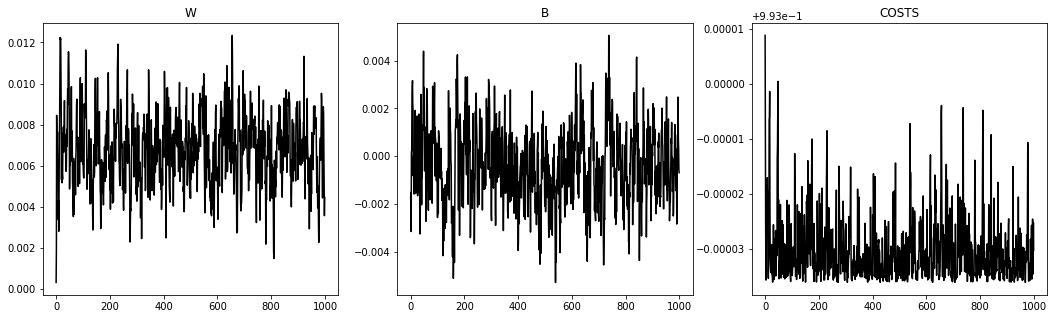

In [7]:
fig=plt.figure(figsize=(18,5))

plt.subplot(131)
plt.title('W')
plt.plot(W,c='k')

plt.subplot(132)
plt.title('B')
plt.plot(B,c='k')

plt.subplot(133)
plt.title('COSTS')
plt.plot(COSTS,c='k')
plt.show()